In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('student_evaluation.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
from sklearn.cluster import KMeans

In [10]:
km=KMeans(n_clusters=2)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
km.score(df)

-231353.75868577335

In [14]:
km.inertia_

231353.7586857733

In [16]:
predict=km.predict(df)
predict

array([0, 0, 1, ..., 1, 0, 0])

In [19]:
x=pd.Series(predict).value_counts()
x

0    3148
1    2672
dtype: int64

In [20]:
l=[]
for i in range(1,20):
    km=KMeans(n_jobs=-1,n_clusters=i)
    km.fit(df)
    l.append(km.inertia_)

In [26]:
y=pd.DataFrame({'Cluster':range(1,20),'Inertia':l})

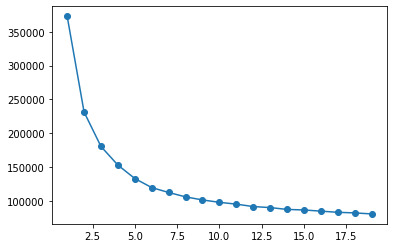

In [28]:
plt.plot(y['Cluster'],y['Inertia'],marker='o')